# Airbnb Price Prediction and Analysis

### Importing relevant libraries 

In [1]:
import warnings
warnings.simplefilter('ignore')

#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

### Loading Dataset and Data details

In [2]:
data = pd.read_csv('Airbnb_Data.csv')
df = data.copy()
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [3]:
df.shape

(74111, 29)

In [4]:
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [5]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [7]:
df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

### Handling missing values

In [8]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

In [9]:
new_df=df.drop(['id','name','description','first_review','host_since','host_has_profile_pic',
               'host_identity_verified', 'last_review','neighbourhood','thumbnail_url','zipcode','host_response_rate'],axis=1)

In [10]:
new_df.head()

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,f,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,t,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,t,40.808110,-73.943756,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,f,37.772004,-122.431619,0,NaN,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,t,38.925627,-77.034596,4,40.0,0.0,1.0


In [11]:
new_df.isnull().sum()

log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                 200
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
instant_bookable            0
latitude                    0
longitude                   0
number_of_reviews           0
review_scores_rating    16722
bedrooms                   91
beds                      131
dtype: int64

In [12]:
new_df.shape

(74111, 17)

In [13]:
new_df["bathrooms"] = df['bathrooms'].fillna(round(df["bathrooms"].median()))
new_df["review_scores_rating"] = df["review_scores_rating"].fillna(0)
new_df["bedrooms"] = df['bedrooms'].fillna((df["bathrooms"].median()))
new_df["beds"] = df["beds"].fillna((df["bathrooms"].median()))

In [14]:
new_df.isnull().sum()

log_price               0
property_type           0
room_type               0
amenities               0
accommodates            0
bathrooms               0
bed_type                0
cancellation_policy     0
cleaning_fee            0
city                    0
instant_bookable        0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64

### Exploratory Data Analysis

In [15]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)
    
# Function to plot catplot graphs
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

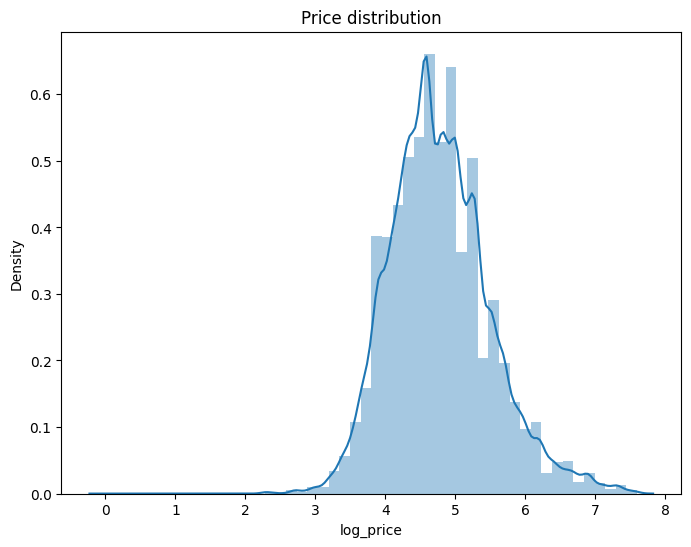

In [16]:
plt.figure(figsize = (8, 6))
sns.distplot(df["log_price"])
plt.title('Price distribution')
plt.show()

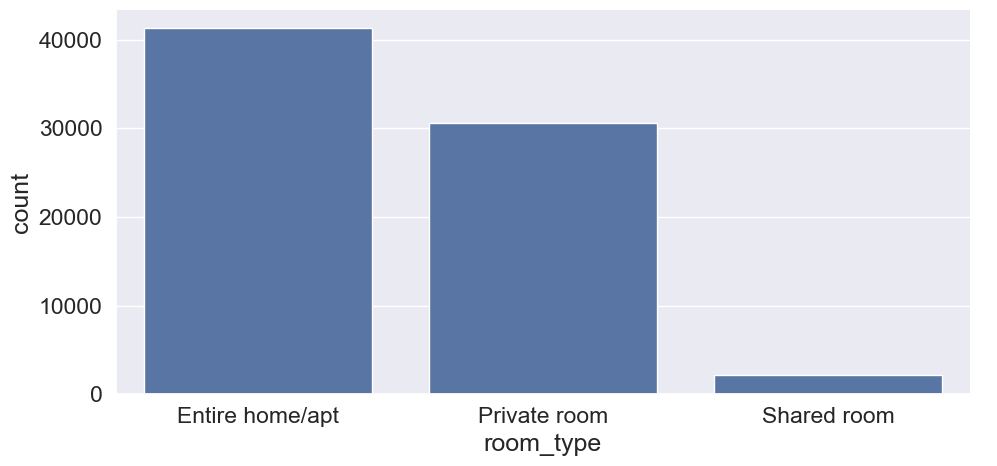

In [17]:
plot_catplot("room_type", "count", 5, 2)

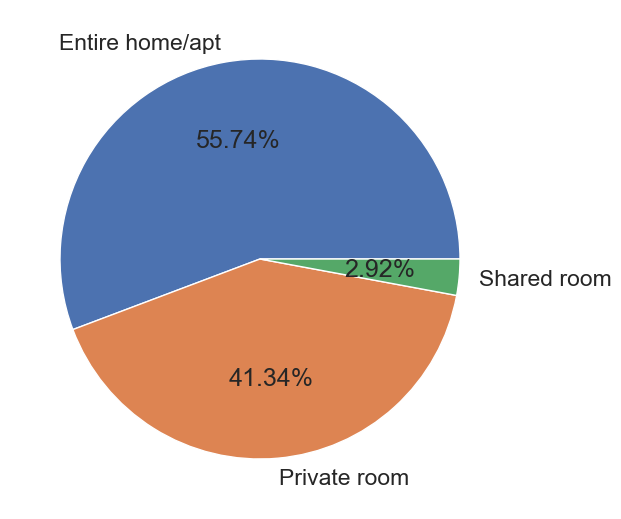

In [18]:
plot_piechart("room_type") 

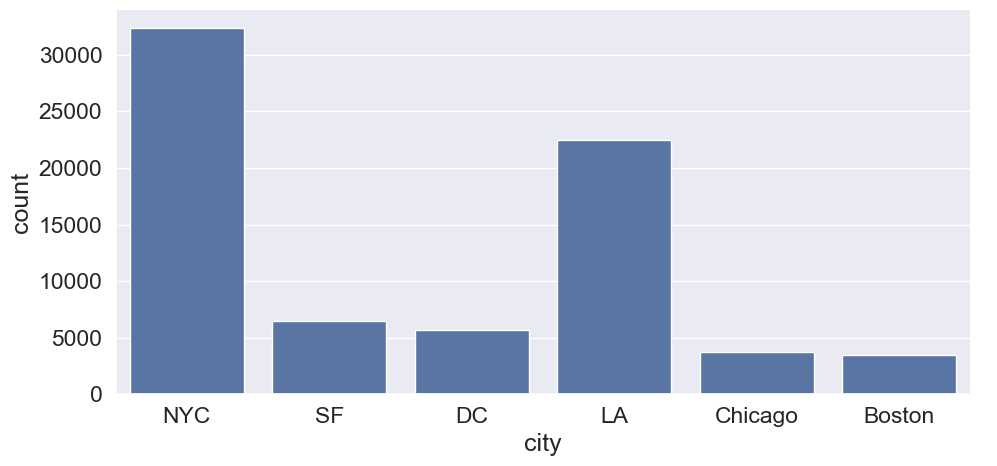

In [19]:
plot_catplot("city","count", 5, 2)

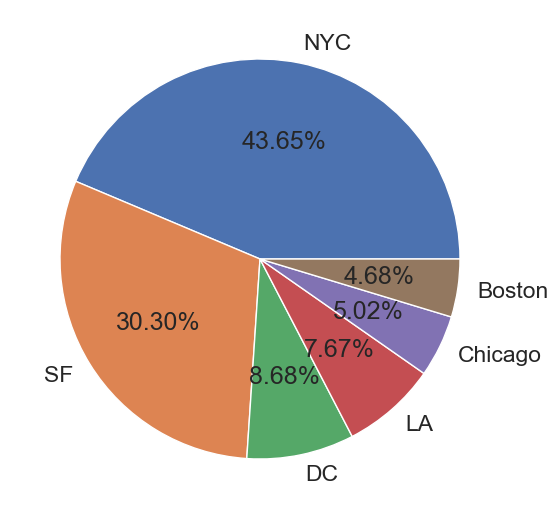

In [20]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
langs = list(df.city.unique())
students =list(df.city.value_counts())
ax.pie(students, labels = langs,autopct='%1.2f%%')
plt.show()

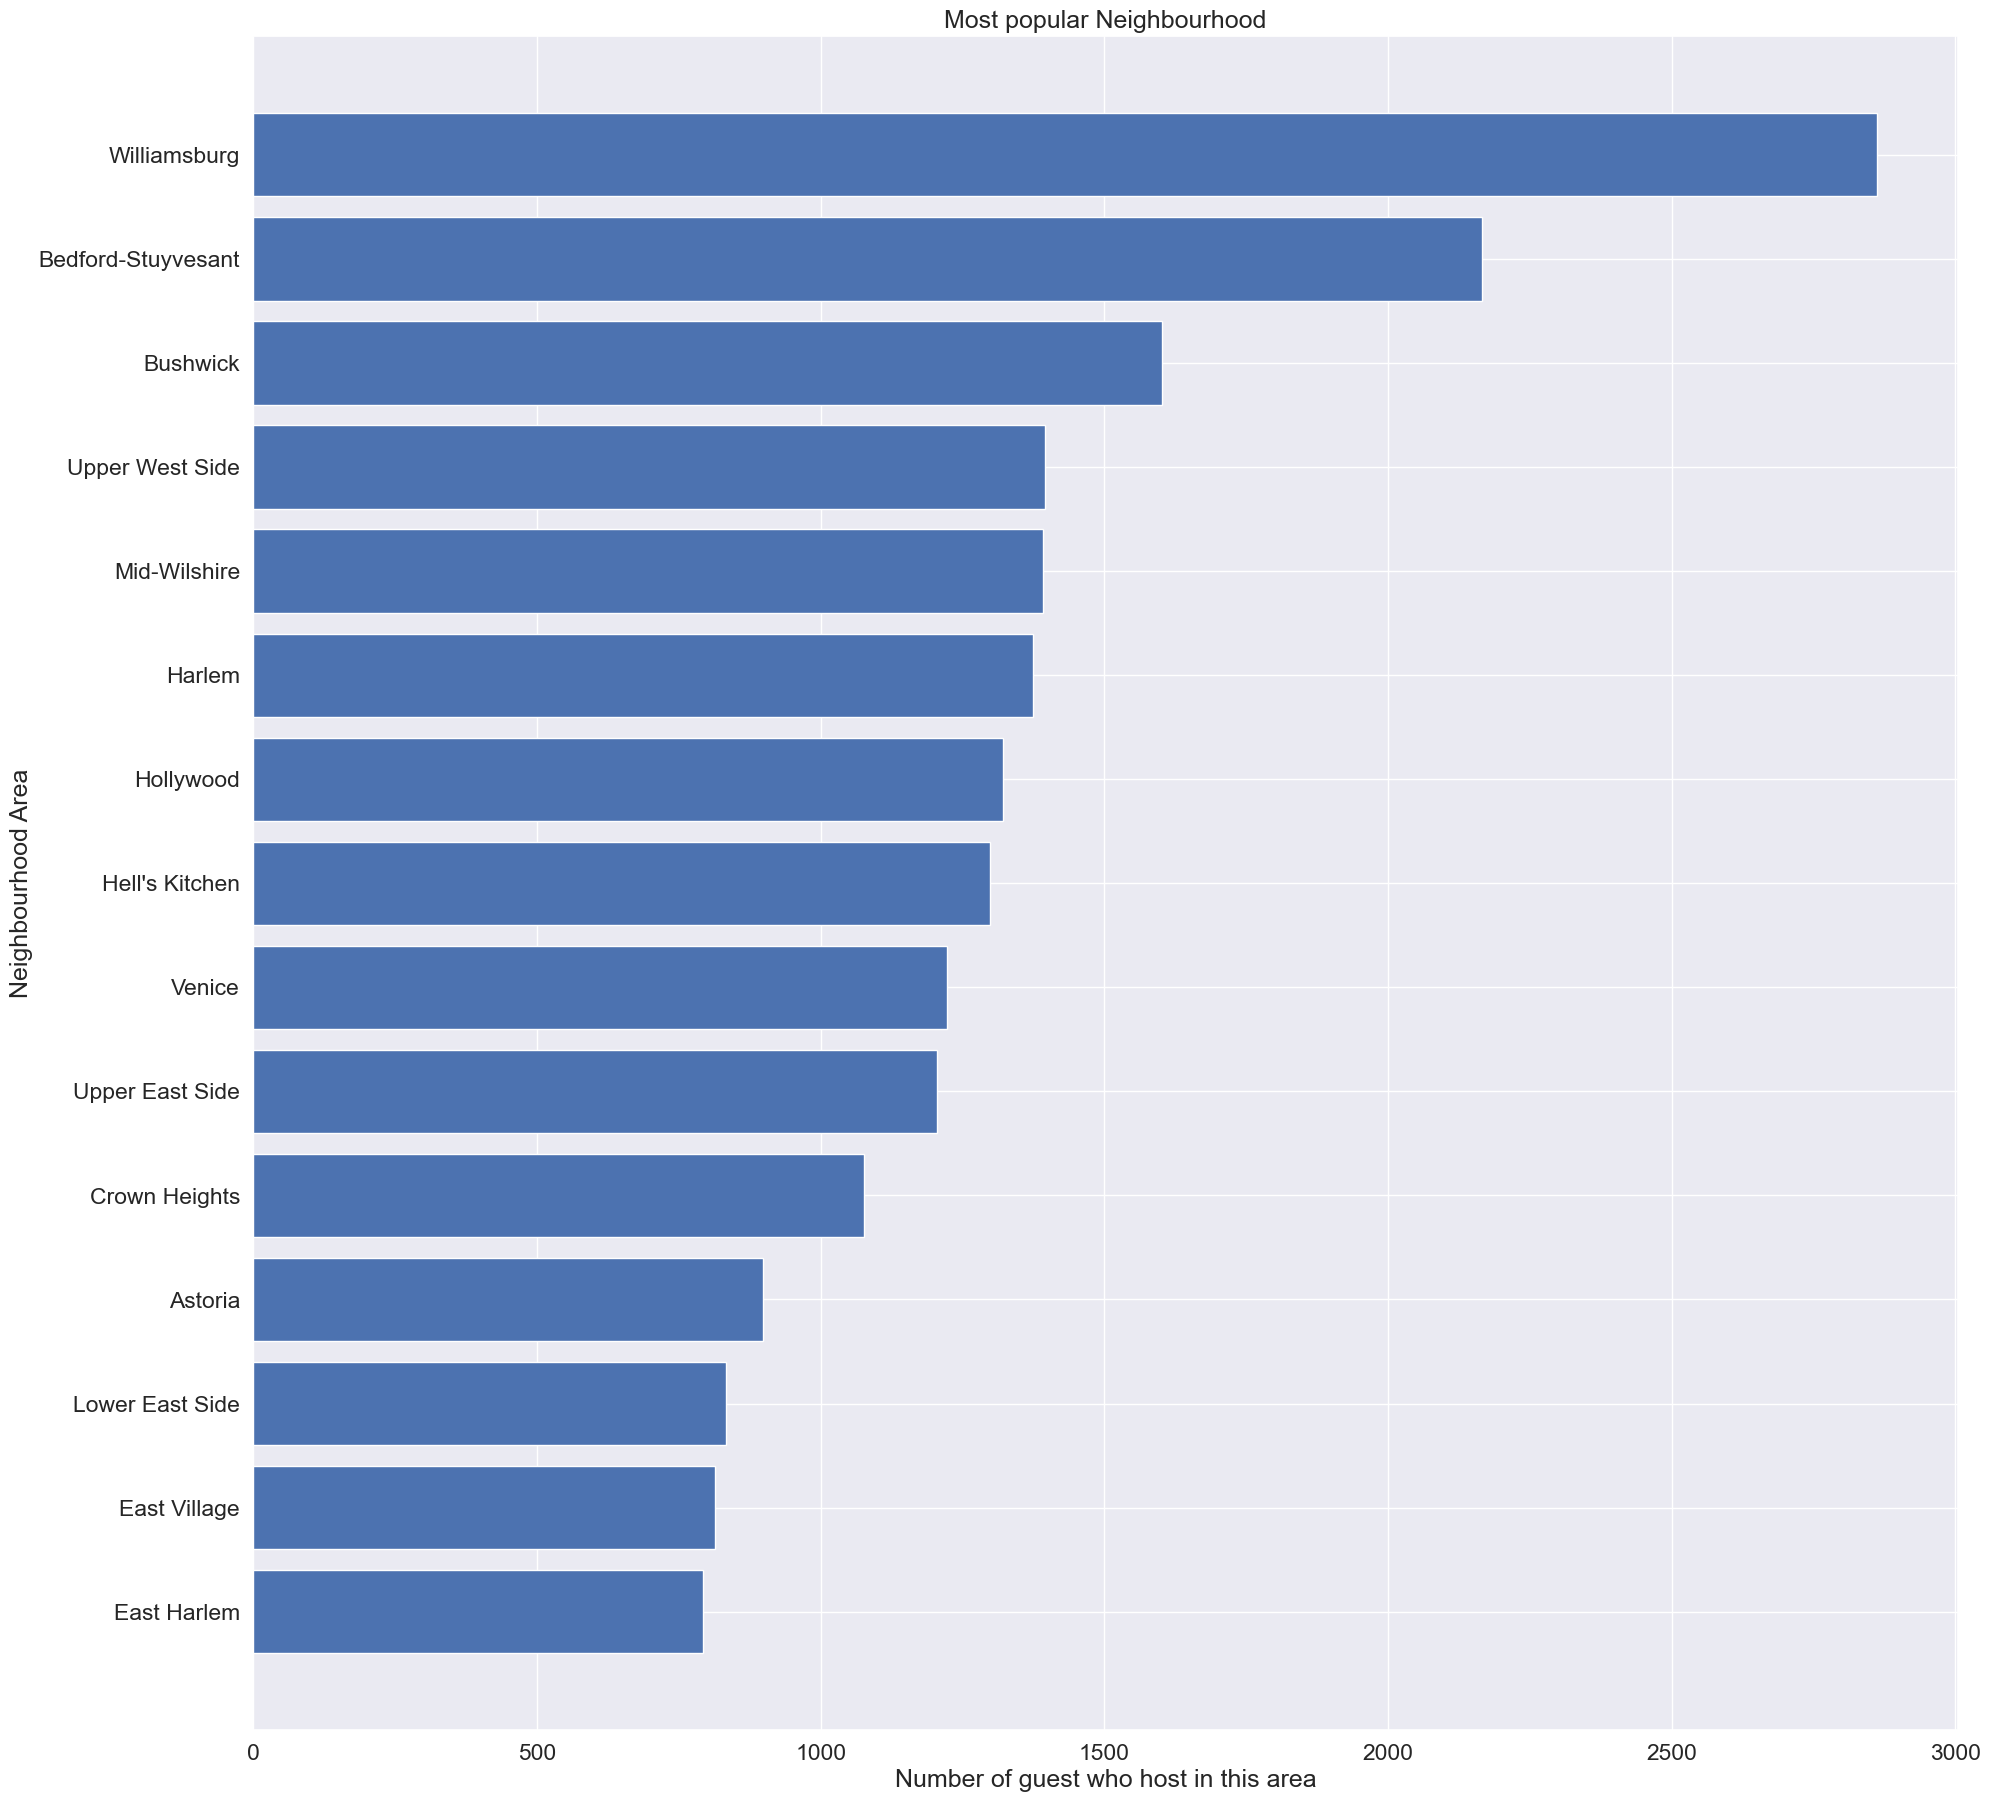

In [21]:
data = df.neighbourhood.value_counts()[:15]
plt.figure(figsize=(22,22))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest who host in this area")

plt.barh(x,y)
plt.show()

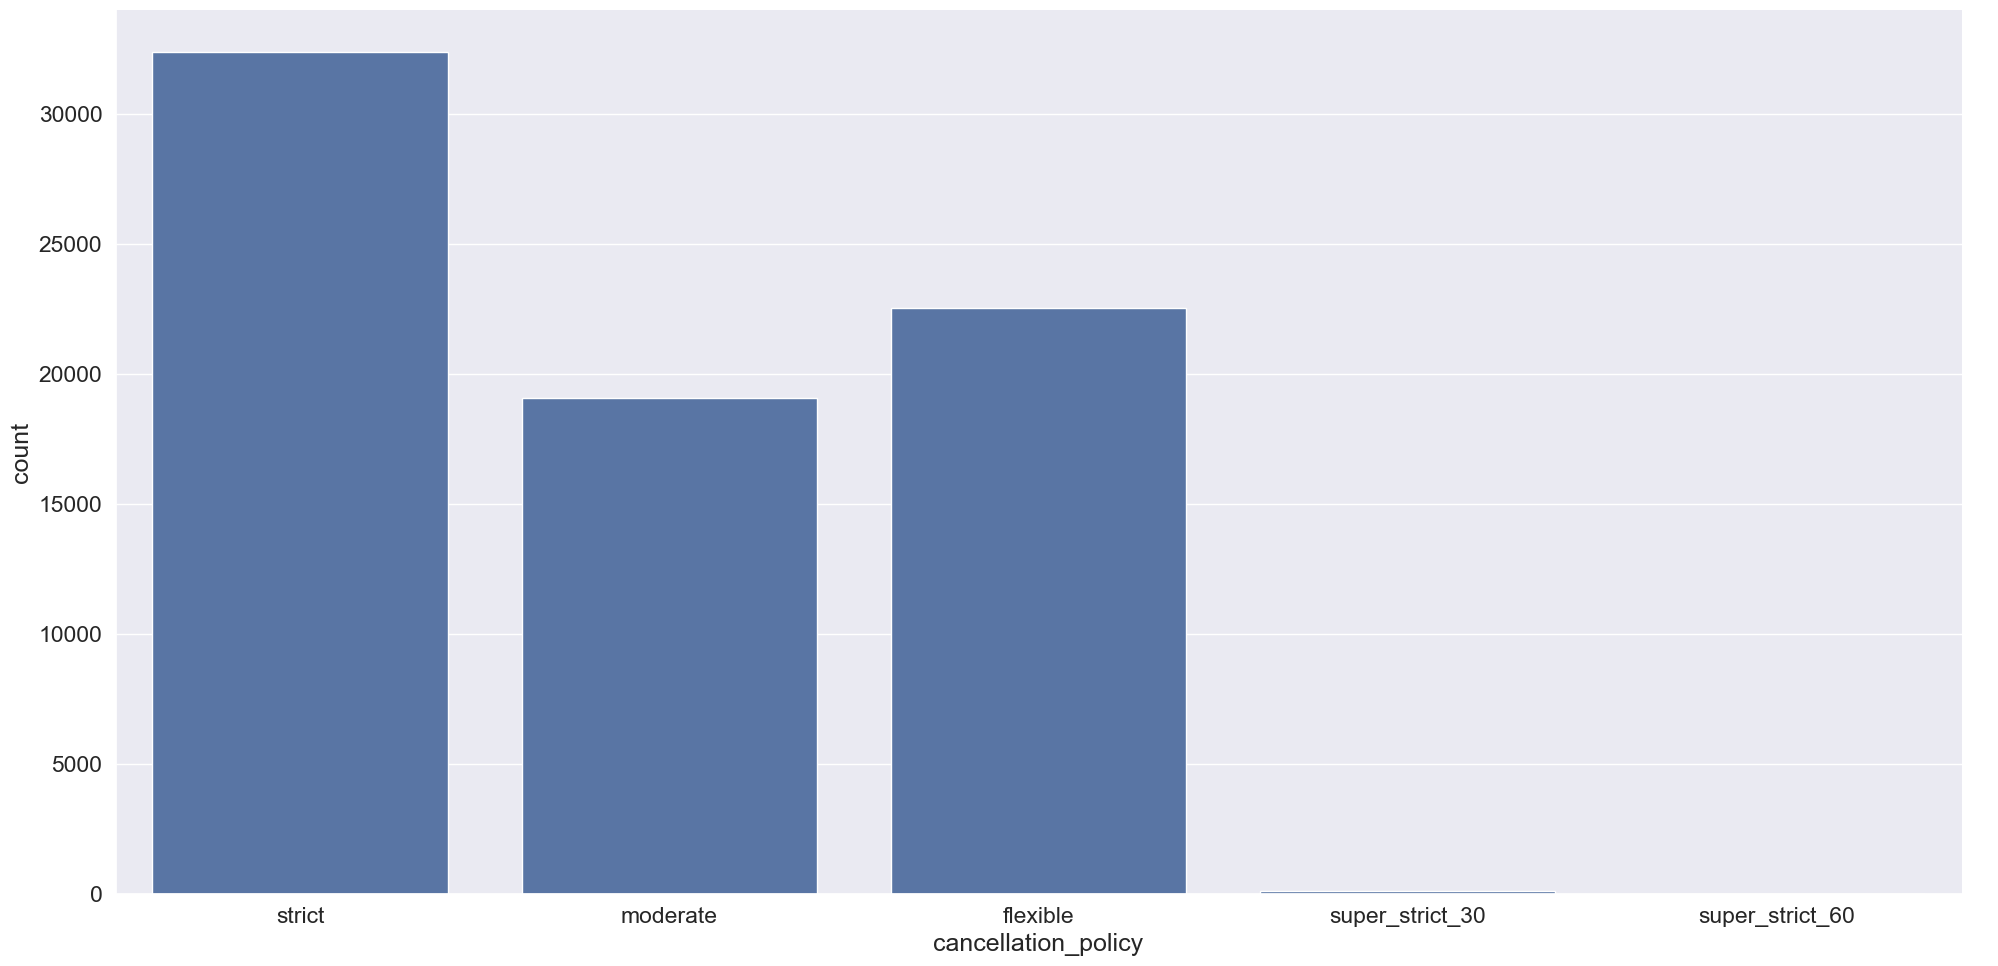

In [22]:
plot_catplot("cancellation_policy","count",10, 2)

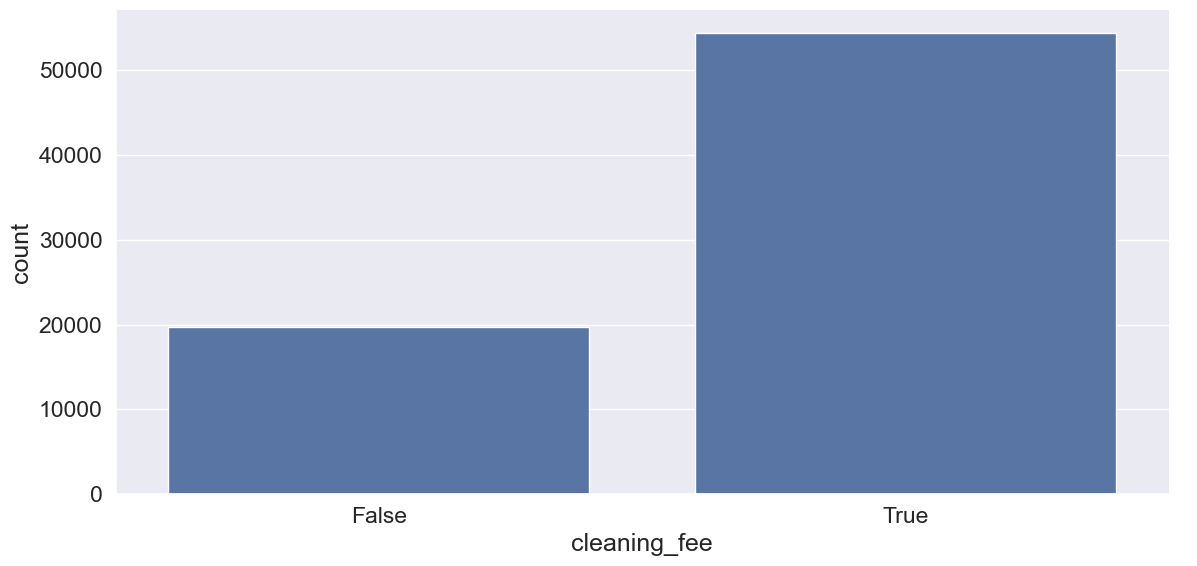

In [23]:
plot_catplot("cleaning_fee","count",6,2)

In [24]:
def plot_boxplot(h,v):
    plt.figure(figsize=(10,8))
    sns.set(font_scale=1.5)
    sns.boxplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

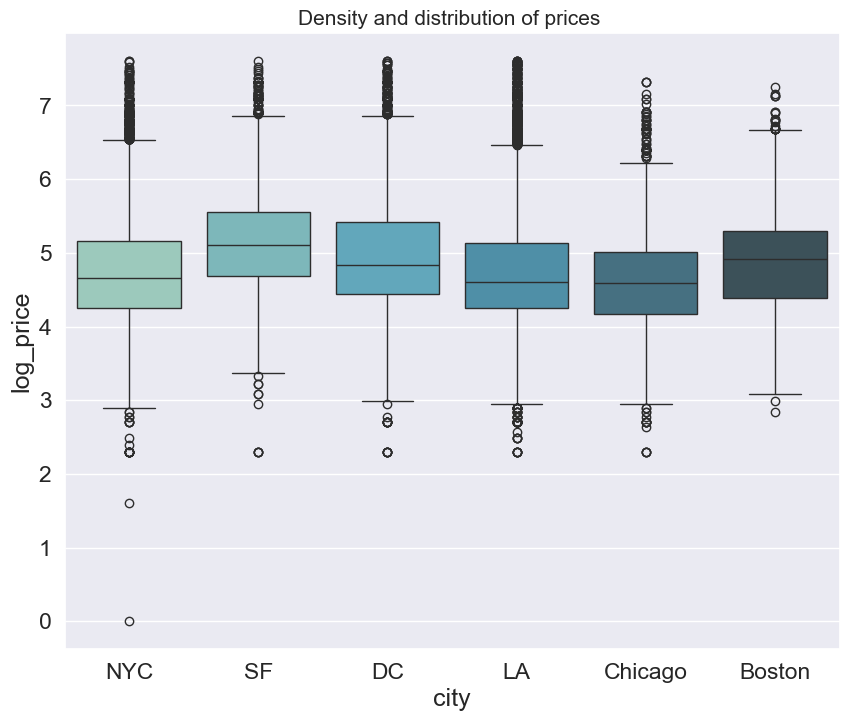

In [25]:
plot_boxplot("city","log_price")

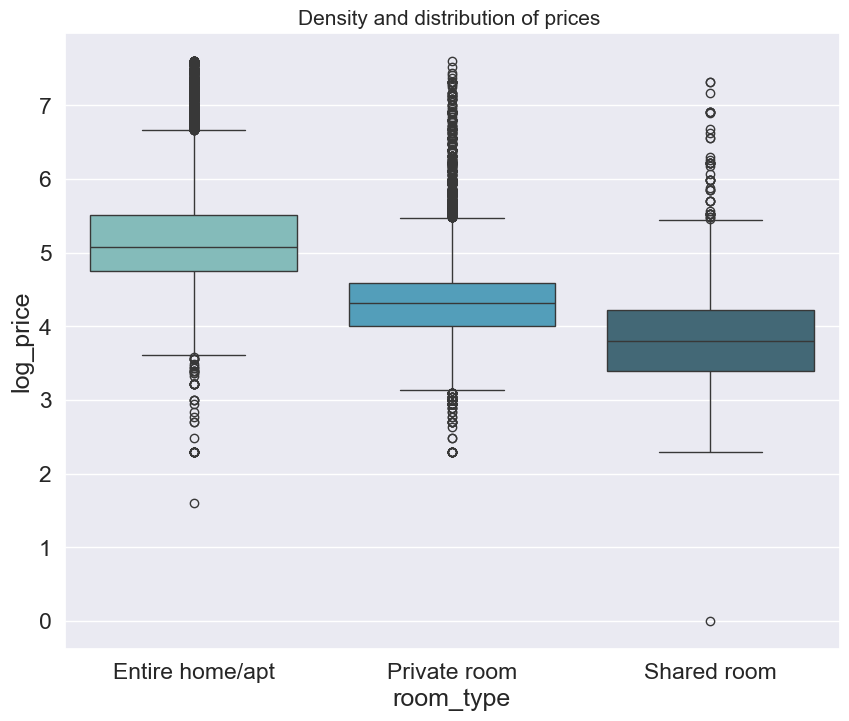

In [26]:
plot_boxplot("room_type","log_price")

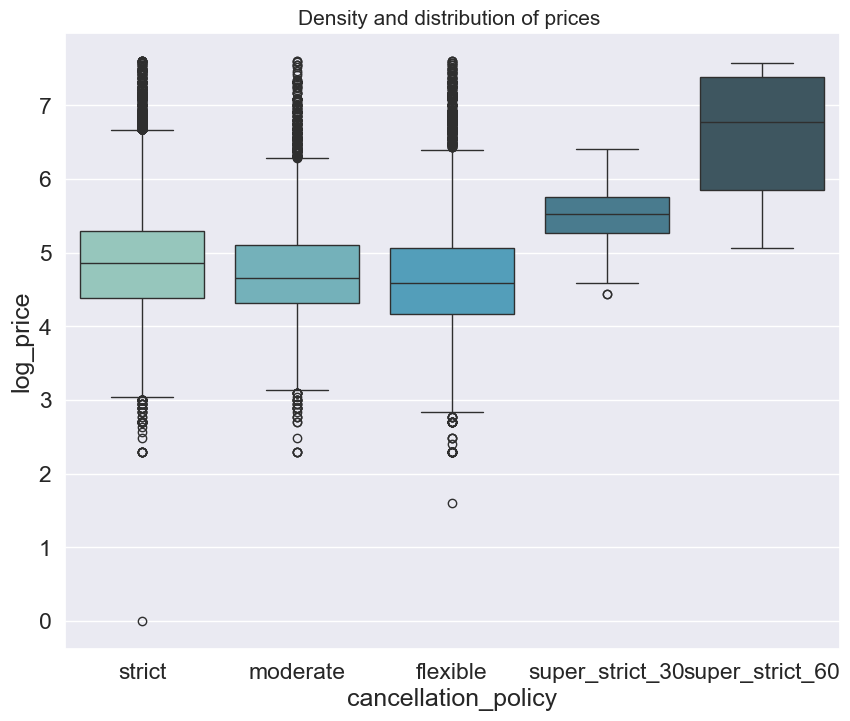

In [27]:
plot_boxplot("cancellation_policy","log_price")

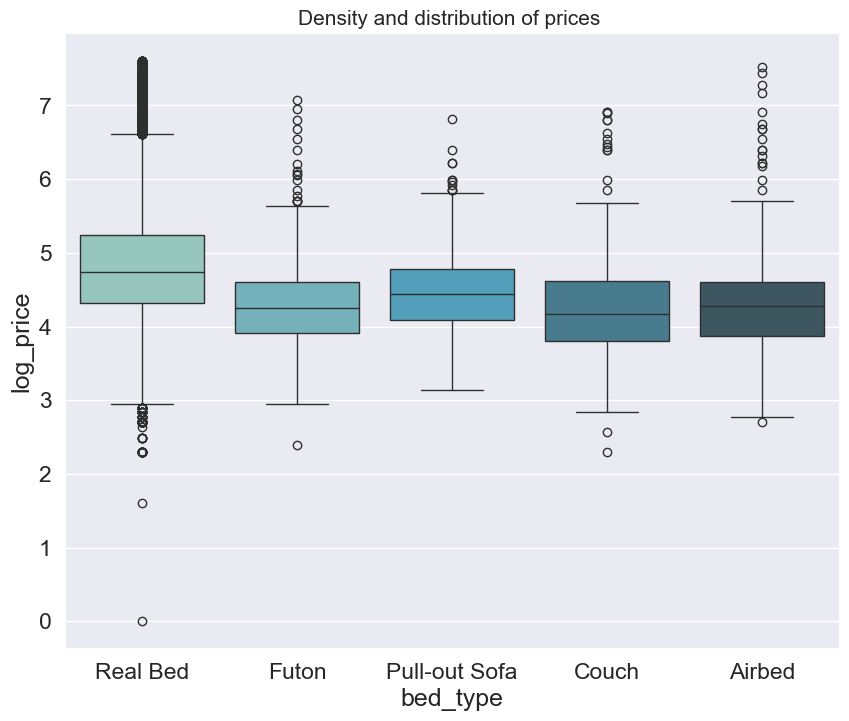

In [28]:
plot_boxplot("bed_type","log_price")

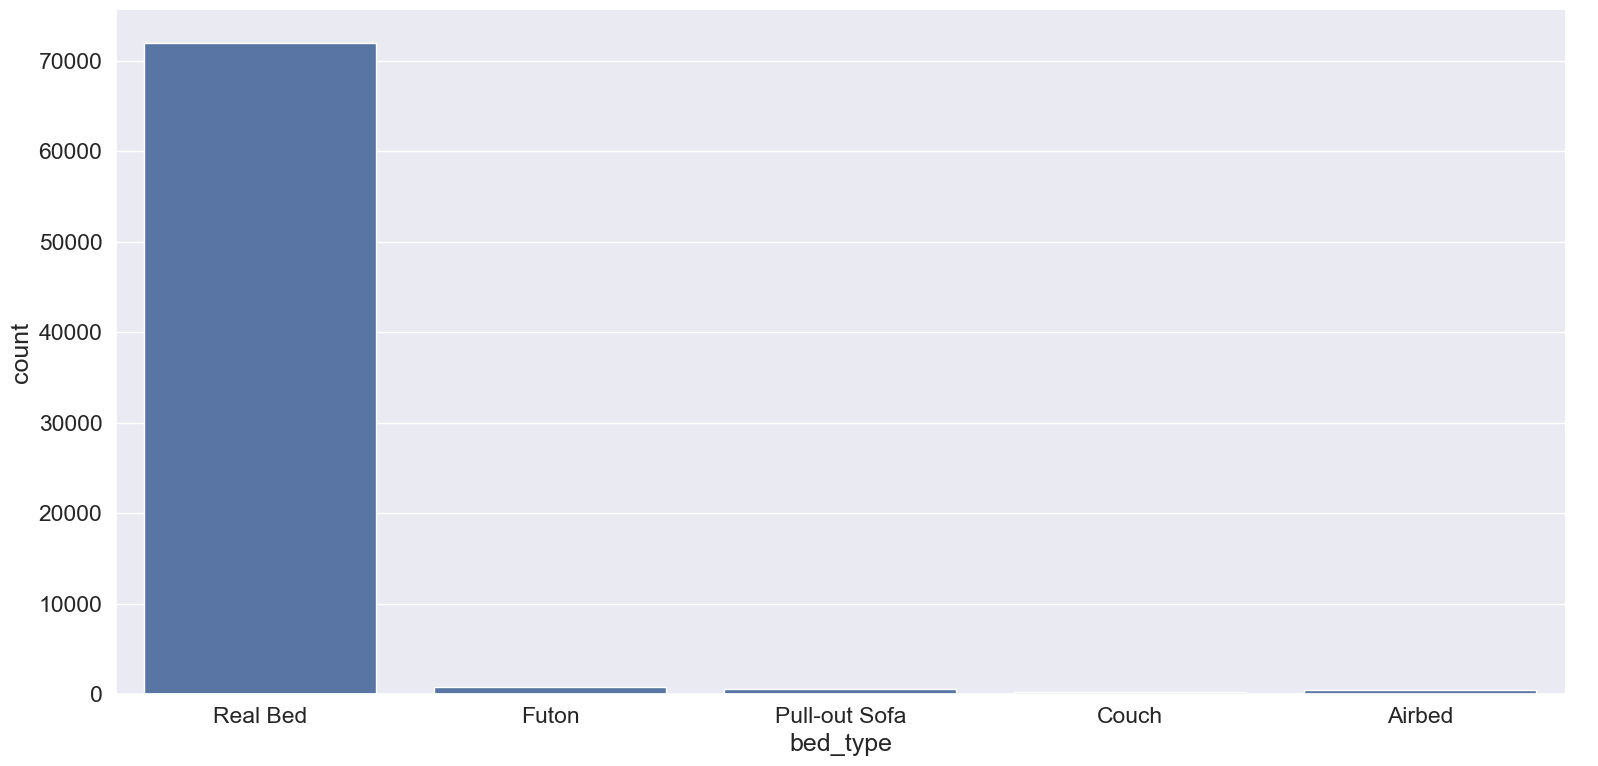

In [29]:
plot_catplot("bed_type","count",8, 2)

### Data Validation

In [30]:
categorical_col = []
numerical_col = []
for column in new_df.columns:
    
    if new_df[column].dtypes != "float64" and new_df[column].dtypes != "int64":
        categorical_col.append(column)
    else:
        numerical_col.append(column)

In [31]:
numerical_col

['log_price',
 'accommodates',
 'bathrooms',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

In [32]:
categorical_col

['property_type',
 'room_type',
 'amenities',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'instant_bookable']

In [33]:
le = LabelEncoder()
for col in categorical_col:
    new_df[col] = le.fit_transform(new_df[col])
pd.set_option("display.max_columns",None)
new_df

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,0,0,6142,3,1.0,4,2,1,4,0,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,0,0,6269,7,1.0,4,2,1,4,1,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,0,0,21345,5,1.0,4,1,1,4,1,40.808110,-73.943756,10,92.0,1.0,3.0
3,6.620073,17,0,38854,4,1.0,4,0,1,5,0,37.772004,-122.431619,0,0.0,2.0,2.0
4,4.744932,0,0,55413,2,1.0,4,1,1,2,1,38.925627,-77.034596,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,0,1,67121,1,1.0,4,0,0,4,0,40.709025,-73.939405,0,0.0,1.0,1.0
74107,5.043425,0,0,38652,4,2.0,4,1,1,3,0,33.871549,-118.396053,16,93.0,2.0,4.0
74108,5.220356,0,0,61276,5,1.0,4,1,1,4,1,40.706749,-73.942377,43,94.0,2.0,2.0
74109,5.273000,0,0,48796,2,1.0,4,2,1,4,1,40.738535,-74.000157,0,0.0,0.0,2.0


In [34]:
x=new_df.drop('log_price',axis=1)
y=new_df['log_price']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

sc= StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### Linear Regression

In [35]:
lr = LinearRegression()

lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test)

mae_lr = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lr = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lr = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Linear Regression     : ', mae_lr)
print('\nMean Squarred Error of Linear Regression     : ', mse_lr)
print('\nRoot Mean Squarred Error of Linear Regression: ', rmse_lr)
print('\nR2 Score of Linear Regression                : ', r2_lr)


Mean Absolute Error of Linear Regression     :  0.3692736528508819

Mean Squarred Error of Linear Regression     :  0.23678764300950889

Root Mean Squarred Error of Linear Regression:  0.48660830552869616

R2 Score of Linear Regression                :  0.5390778551702982


### Ridge Regression

In [36]:
ridge_model=Ridge()

ridge_model.fit(x_train,y_train)

y_pred_lr = ridge_model.predict(x_test)

mae_rd = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_rd = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_rd = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_rd = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Ridge Regression     : ', mae_rd)
print('\nMean Squarred Error of Ridge Regression     : ', mse_rd)
print('\nRoot Mean Squarred Error of Ridge Regression: ', rmse_rd)
print('\nR2 Score of Ridge Regression                : ', r2_rd)


Mean Absolute Error of Ridge Regression     :  0.36927357622289536

Mean Squarred Error of Ridge Regression     :  0.23678767928772504

Root Mean Squarred Error of Ridge Regression:  0.4866083428053048

R2 Score of Ridge Regression                :  0.5390777845524526


### Lasso Regression

In [37]:
lasso=Lasso()

lasso.fit(x_train,y_train)

y_pred_lr = lasso.predict(x_test)

mae_lso = metrics.mean_absolute_error(y_test, y_pred_lr)
mse_lso = metrics.mean_squared_error(y_test, y_pred_lr)
rmse_lso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr))
r2_lso = metrics.r2_score(y_test, y_pred_lr)


print('\nMean Absolute Error of Lasso Regression     : ', mae_lso)
print('\nMean Squarred Error of Lasso Regression     : ', mse_lso)
print('\nRoot Mean Squarred Error of Lasso Regression: ', rmse_lso)
print('\nR2 Score of Lasso Regression                : ', r2_lso)


Mean Absolute Error of Lasso Regression     :  0.5603603024938534

Mean Squarred Error of Lasso Regression     :  0.5137845181474041

Root Mean Squarred Error of Lasso Regression:  0.7167876381100641

R2 Score of Lasso Regression                :  -0.00011410677915479894


### CatBoost Regressor

In [38]:
model_CBR = CatBoostRegressor()

model_CBR.fit(x_train, y_train)

cross_val_score(model_CBR, x_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=42,
                                    ))

y_pred_cbr = model_CBR.predict(x_test)

mae_cbr  = metrics.mean_absolute_error(y_test, y_pred_cbr)
mse_cbr  = metrics.mean_squared_error(y_test, y_pred_cbr)
rmse_cbr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cbr))
r2_cbr   = metrics.r2_score(y_test, y_pred_cbr)

Learning rate set to 0.078038
0:	learn: 0.6888342	total: 136ms	remaining: 2m 15s
1:	learn: 0.6633556	total: 147ms	remaining: 1m 13s
2:	learn: 0.6402139	total: 158ms	remaining: 52.6s
3:	learn: 0.6196732	total: 168ms	remaining: 41.8s
4:	learn: 0.6012760	total: 176ms	remaining: 35s
5:	learn: 0.5852158	total: 186ms	remaining: 30.8s
6:	learn: 0.5707201	total: 196ms	remaining: 27.8s
7:	learn: 0.5579845	total: 210ms	remaining: 26.1s
8:	learn: 0.5468772	total: 224ms	remaining: 24.7s
9:	learn: 0.5370015	total: 235ms	remaining: 23.3s
10:	learn: 0.5263426	total: 247ms	remaining: 22.2s
11:	learn: 0.5183964	total: 259ms	remaining: 21.3s
12:	learn: 0.5114569	total: 270ms	remaining: 20.5s
13:	learn: 0.5037176	total: 279ms	remaining: 19.6s
14:	learn: 0.4980059	total: 290ms	remaining: 19s
15:	learn: 0.4915745	total: 302ms	remaining: 18.6s
16:	learn: 0.4870416	total: 312ms	remaining: 18s
17:	learn: 0.4820886	total: 323ms	remaining: 17.6s
18:	learn: 0.4774745	total: 334ms	remaining: 17.3s
19:	learn: 0.47

In [39]:
print('\nMean Absolute Error of CatBoost Regressor     : ', mae_cbr)
print('\nMean Squarred Error of CatBoost Regressor     : ', mse_cbr)
print('\nRoot Mean Squarred Error of CatBoost Regressor: ', rmse_cbr)
print('\nR2 Score of CatBoost Regressor                : ', r2_cbr)


Mean Absolute Error of CatBoost Regressor     :  0.27593677092232605

Mean Squarred Error of CatBoost Regressor     :  0.14499990268282148

Root Mean Squarred Error of CatBoost Regressor:  0.3807885275094583

R2 Score of CatBoost Regressor                :  0.7177485053897841


### GradientBoost Regressor

In [40]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

gb.fit(x_train, y_train)

y_pred_gb = gb.predict(x_test)

mae_gb  = metrics.mean_absolute_error(y_test, y_pred_gb)
mse_gb  = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb))
r2_gb   = metrics.r2_score(y_test, y_pred_gb)


print('\nMean Absolute Error of Gradient Boosting     : ', mae_gb)
print('\nMean Squarred Error of Gradient Boosting     : ', mse_gb)
print('\nRoot Mean Squarred Error of Gradient Boosting: ', rmse_gb)
print('\nR2 Score of Gradient Boosting                : ', r2_gb)


Mean Absolute Error of Gradient Boosting     :  0.30046318052890075

Mean Squarred Error of Gradient Boosting     :  0.16887799478379562

Root Mean Squarred Error of Gradient Boosting:  0.410947678888439

R2 Score of Gradient Boosting                :  0.6712682867189974


### XGBoost Regressor

In [41]:
xgb = XGBRegressor(objective='reg:squarederror')
xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.27948472481861636

Mean Squarred Error of XGBoost Regressor     :  0.1486528056375657

Root Mean Squarred Error of XGBoost Regressor:  0.38555519142862765

R2 Score of XGBoost Regressor                :  0.7106378984199438


### Decision Tree Regressor

In [42]:
dec_reg=DecisionTreeRegressor(criterion="squared_error",splitter="best",max_depth=5,
                              min_samples_split=4,max_features='sqrt')
dec_reg.fit(x_train, y_train)

y_pred_xgb = dec_reg.predict(x_test)

mae_dt  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_dt  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_dt   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of Decision Tree Regressor     : ', mae_dt)
print('\nMean Squarred Error of Decision Tree Regressor     : ', mse_dt)
print('\nRoot Mean Squarred Error of Decision Tree Regressor: ', rmse_dt)
print('\nR2 Score of Decision Tree Regressor                : ', r2_dt)


Mean Absolute Error of Decision Tree Regressor     :  0.3772185393998122

Mean Squarred Error of Decision Tree Regressor     :  0.2508718327429081

Root Mean Squarred Error of Decision Tree Regressor:  0.5008710739730415

R2 Score of Decision Tree Regressor                :  0.5116620877864987


### Random Forest Regressor

In [43]:
rmf_reg=RandomForestRegressor(n_estimators=100,criterion="squared_error",
                              bootstrap=True,oob_score=True)
rmf_reg.fit(x_train, y_train)

y_pred_xgb = rmf_reg.predict(x_test)

mae_rf  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_rf  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_rf  = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of Random Forest Regressor     : ', mae_rf)
print('\nMean Squarred Error of Random Forest Regressor     : ', mse_rf)
print('\nRoot Mean Squarred Error of Random Forest Regressor: ', rmse_rf)
print('\nR2 Score of Random Forest Regressor                : ', r2_rf)


Mean Absolute Error of Random Forest Regressor     :  0.2826950701628308

Mean Squarred Error of Random Forest Regressor     :  0.15371037141590138

Root Mean Squarred Error of Random Forest Regressor:  0.3920591427525972

R2 Score of Random Forest Regressor                :  0.700793026295117


### Final thoughts on Regression Models

In [44]:
r2_list = {"Linear Regression": r2_lr,
           "Ridge Regression":r2_rd,
           "Lasso Regression": r2_lso,
          "CatBoost": r2_cbr,
          "Gradient Boosting":r2_gb ,
          "XGBoost": r2_xgb,
           "Decision Tree": r2_dt,
          "Random Forest": r2_rf }

mae_list = {"Linear Regression": mae_lr,
           "Ridge Regression": mae_rd,
           "Lasso Regression": mae_lso,
          "CatBoost": mae_cbr,
          "Gradient Boosting": mae_gb ,
          "XGBoost": mae_xgb,
           "Decision Tree": mae_dt,
          "Random Forest": mae_rf}

mse_list = {"Linear Regression": mse_lr,
           "Ridge Regression": mse_rd,
           "Lasso Regression": mse_lso,
          "CatBoost": mse_cbr,
          "Gradient Boosting": mse_gb ,
          "XGBoost": mse_xgb,
           "Decision Tree": mse_dt,
          "Random Forest": mse_rf}

rmse_list = {"Linear Regression": rmse_lr,
           "Ridge Regression": rmse_rd,
           "Lasso Regression": rmse_lso,
          "CatBoost": rmse_cbr,
          "Gradient Boosting": rmse_gb ,
          "XGBoost": rmse_xgb,
           "Decision Tree": rmse_dt,
          "Random Forest": rmse_rf}

In [45]:
a1 =  pd.DataFrame.from_dict(r2_list, orient = 'index', columns = ["R2 SCORE"])
a2 =  pd.DataFrame.from_dict(mae_list, orient = 'index', columns = ["MEAN ABSOLUTE ERROR"])
a3 =  pd.DataFrame.from_dict(mse_list, orient = 'index', columns = ["MEAN SQUARRED ERROR"])
a4 =  pd.DataFrame.from_dict(rmse_list, orient = 'index', columns = ["ROOT MEAN SQUARRED ERROR"])

In [46]:
org = pd.concat([a1, a2, a3, a4], axis = 1)
org

,R2 SCORE,MEAN ABSOLUTE ERROR,MEAN SQUARRED ERROR,ROOT MEAN SQUARRED ERROR
Linear Regression,0.539078,0.369274,0.236788,0.486608
Ridge Regression,0.539078,0.369274,0.236788,0.486608
Lasso Regression,-0.000114,0.560360,0.513785,0.716788
CatBoost,0.717749,0.275937,0.145000,0.380789
Gradient Boosting,0.671268,0.300463,0.168878,0.410948
XGBoost,0.710638,0.279485,0.148653,0.385555
Decision Tree,0.511662,0.377219,0.250872,0.500871
Random Forest,0.700793,0.282695,0.153710,0.392059


Comment: By comparing R2 score we find out that Catboost and XGboost model performing equally and best. And also Random forest, Gradient Boost model performing little good respectively. 